Ischaemic-Heart-Disease07-11.csv
COPD07-11.csv
Heart-Failure07-11.csv
Asthma07-11.csv
Skin-Cancer07-11.csv
Ischaemic-Heart-Disease12-16.csv
COPD12-16.csv
Heart-Failure12-16.csv
Asthma12-16.csv
Skin-Cancer12-16.csv


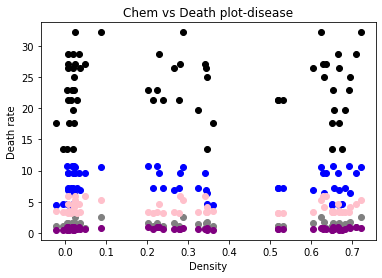

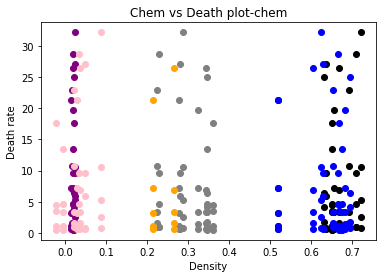

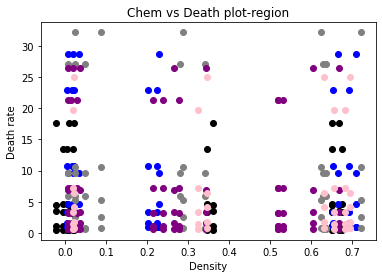

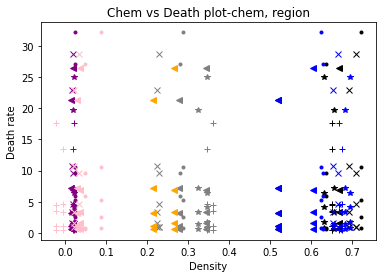

<Figure size 432x288 with 0 Axes>

In [19]:
import pandas as pd
import argparse
from datetime import date
import matplotlib.pyplot as plt
import numpy as np

regions = ['east_metro', 'geelong', 'gippsland', 'nw_metro', 'south_metro']
years = ['07-11', '12-16']
diseases = ['Ischaemic-Heart-Disease', 'COPD', 'Heart-Failure', 'Asthma', 'Skin-Cancer']

f_list = []
for i in years:      
    for j in diseases:
        d_list = []
        y_list = []
        csv_name = j + i + '.csv'
        data = pd.read_csv(csv_name)
        print(csv_name)
        
        for k in range(0, len(data.index)):
            d_list.append(j)
            y_list.append(i)
            
        data['diseases'] = d_list
        data['years'] = y_list
    
        f_list.append(data)

#print(f_list[0])
start = f_list[0]

for i in f_list[1:]:
    for j in i.index:
        start.loc[-1] = i.loc[j]  # adding a row
        start.index = start.index + 1  # shifting index
        start = start.sort_index()  # sorting by index

#print(start)

color = ['black', 'blue', 'grey', 'purple', 'pink', 'orange', 'red', 'yellow', 'green']

csv_name_o = 'final' + '.csv'
start.to_csv(csv_name_o, index = False)

count = 0;
for i in diseases:
    
    k = start.loc[start['diseases'] == i]

    #print(k['value'])
    x = k['value']
    y = k['Death_Rate']

    plt.plot(x, y, 'o', color=color[count]);
    plt.title('Chem vs Death plot-disease')
    plt.xlabel('Density')
    plt.ylabel('Death rate')
    #plt.scatter(x, y)
    count = count + 1

plt.savefig('Chem vs Death plot-disease.png')
plt.show()
plt.clf()

count = 0;
chems = ['PM10', 'O3', 'NO2', 'API', 'SO2', 'PPM2.5']
for i in chems:
    
    k = start.loc[start['param_id'] == i]

    #print(k['value'])
    x = k['value']
    y = k['Death_Rate']

    plt.plot(x, y, 'o', color=color[count]);
    plt.title('Chem vs Death plot-chem')
    plt.xlabel('Density')
    plt.ylabel('Death rate')
    count = count + 1

plt.savefig('Chem vs Death plot-chems.png')
plt.show()

regions_a = ['East_Metro', 'Geelong', 'Gippsland', 'NorthE_Metro', 'South_Metro']
count = 0
count_a = 0
for i in regions_a:
    
    k = start.loc[start['Region'] == i]

    #print(k['value'])
    x = k['value']
    y = k['Death_Rate']

    plt.plot(x, y, 'o', color=color[count]);
    plt.title('Chem vs Death plot-region')
    plt.xlabel('Density')
    plt.ylabel('Death rate')
    #plt.scatter(x, y)
    count = count + 1

plt.savefig('Chem vs Death plot-region.png')
plt.show()
plt.clf()


count = 0;
count_a = 0
shape = ['+', 'x', '.', '<', '*']
for i in chems:
    count = 0;
    k = start.loc[start['param_id'] == i]
    for j in regions_a:
        a = k.loc[k['Region'] == j]
        x = a['value']
        y = a['Death_Rate']

        plt.plot(x, y, shape[count%5], color=color[count_a%6]);
        plt.title('Chem vs Death plot-chem, region')
        count = count + 1
    count_a = count_a + 1
plt.xlabel('Density')
plt.ylabel('Death rate')

plt.savefig('Chem vs Death plot-chem, region.png')
plt.show()
plt.clf()